Dataset = https://www.kaggle.com/c/digit-recognizer/data


#### ` Opening this file in colab is preferred`



### Created by: Chetan, AIML-1, 18BCS6056

# Data pre-processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [ ]:
# read the dataset
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
one = df.iloc[2, 1:]
one.shape

(784,)

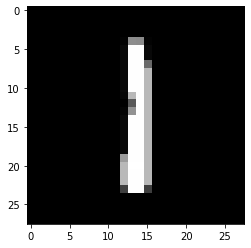

In [ ]:
one1 = one.values.reshape(28, 28)
plt.imshow(one1, cmap='gray')

In [ ]:
df.label.value_counts() # count the total number of values for each number

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
100*(round(df.label.astype('category').value_counts()/len(df.index), 4)) #show the total percentage of each number

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [ ]:
df.isnull().sum() # Check for missing values

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
rowsdata = int((df.shape[0])*.2) # Specifying to take only 20% of the data
r1 = np.random.randint(0,df.shape[0],rowsdata)  # Taking that 20% data at random
df1 = df.iloc[r1,:]

In [ ]:
df1.shape

(8400, 785)

In [ ]:
df1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
8176,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35075,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39171,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20972,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5148,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data Preparation for Model Building

Let's now prepare the dataset for building the model. We'll only use a fraction of the data else training will take a long time.


In [ ]:
# Splitting the data into train and test
features = df1.iloc[:, 1:]
target = df1.iloc[:, 0]

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6720, 784)
(1680, 784)
(6720,)
(1680,)


In [ ]:
col_name = list(x_train.columns)
col_name1 = list(x_test.columns)

In [ ]:
#Min Max Scaling of the features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train[col_name] = sc.fit_transform(x_train[col_name])
x_test[col_name1] = sc.fit_transform(x_test[col_name1])
'''
or use:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train1 = scaler.fit_transform(x_train)
x_train1 = pd.DataFrame(x_train1,columns=[x_train.columns])
'''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

'\nor use:\n\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nx_train1 = scaler.fit_transform(x_train)\nx_train1 = pd.DataFrame(x_train1,columns=[x_train.columns])\n'

# Model Building
## we will build model using 3 types: linear, non linear(rbf), non linear using hypermeters using cross validation

### 1. Linear SVM

Let's first try building a linear SVM model (i.e. a linear kernel). 

In [ ]:
from sklearn import svm
from sklearn import metrics
# SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear') # Making Model
svm_linear.fit(x_train, y_train) # Training Model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predicting 
Y_pred = svm_linear.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix as cm
cm1 = cm(y_test,Y_pred) 
''' make confusion matirx with y axis having y_test and x axis having Y_pred, it is same as cm(y_true = y_test,y_pred = Y_pred) '''
print(cm1)

[[172   0   0   1   0   0   0   0   1   1]
 [  0 183   1   1   1   0   0   0   0   0]
 [  2   0 165   3   4   0   1   1   1   0]
 [  1   0   3 161   1   8   0   2   3   1]
 [  0   1   2   0 150   0   3   0   1   4]
 [  4   2   0   7   1 131   4   0   1   0]
 [  2   0   4   1   2   3 126   0   1   0]
 [  0   0   1   1   2   0   1 176   0   1]
 [  1   2   5   5   1   6   2   0 142   1]
 [  0   0   1   0   9   3   1   5   1 145]]


In [ ]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,Y_pred)) #print the classification report

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       175
           1       0.97      0.98      0.98       186
           2       0.91      0.93      0.92       177
           3       0.89      0.89      0.89       180
           4       0.88      0.93      0.90       161
           5       0.87      0.87      0.87       150
           6       0.91      0.91      0.91       139
           7       0.96      0.97      0.96       182
           8       0.94      0.86      0.90       165
           9       0.95      0.88      0.91       165

    accuracy                           0.92      1680
   macro avg       0.92      0.92      0.92      1680
weighted avg       0.92      0.92      0.92      1680



In [ ]:
from sklearn.metrics import accuracy_score as acc
acc(y_true=y_test, y_pred=Y_pred)

0.9232142857142858

### 2. Non-Linear SVM

Let's now try a non-linear model with the RBF kernel.

In [ ]:
# rbf kernel
svm_rbf = svm.SVC(kernel='rbf') # Building Model 
svm_rbf.fit(x_train, y_train) # Training Model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predicting
Y_pred_nl = svm_rbf.predict(x_test) 
print(acc(y_true=y_test, y_pred=Y_pred_nl))

0.9672619047619048


### 3. Grid Search Cross-Validation
grid search CV to tune the hyperparameters C and gamma.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = dict()
parameters['C'] = [1, 10, 100]
parameters['gamma']= [1e-2, 1e-3, 1e-4]
svc_grid_search = svm.SVC(kernel="rbf")
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')
result = clf.fit(x_train, y_train)

In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.183993,0.068143,3.902567,0.038690,1,0.01,"{'C': 1, 'gamma': 0.01}",0.945685,0.947917,0.950149,0.944940,0.958333,0.949405,0.004822,3
1,18.532338,0.158661,5.541212,0.025081,1,0.001,"{'C': 1, 'gamma': 0.001}",0.899554,0.904762,0.904018,0.890625,0.922619,0.904315,0.010444,7
2,45.966164,0.331723,8.181721,0.072988,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.754464,0.750000,0.764137,0.758185,0.773810,0.760119,0.008267,9
3,9.514112,0.066269,3.507088,0.038258,10,0.01,"{'C': 10, 'gamma': 0.01}",0.960565,0.960565,0.959821,0.963542,0.968006,0.962500,0.003035,1
4,8.340811,0.103847,3.358171,0.023942,10,0.001,"{'C': 10, 'gamma': 0.001}",0.921875,0.932292,0.930060,0.923363,0.946429,0.930804,0.008741,5
5,17.659732,0.089649,5.331787,0.038133,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.898065,0.901786,0.901786,0.889137,0.919643,0.902083,0.009922,8
6,9.235151,0.081311,3.374230,0.034968,100,0.01,"{'C': 100, 'gamma': 0.01}",0.959821,0.959821,0.959821,0.963542,0.968750,0.962351,0.003509,2
7,6.394458,0.056742,2.746870,0.031776,100,0.001,"{'C': 100, 'gamma': 0.001}",0.934524,0.930060,0.936756,0.934524,0.943452,0.935863,0.004374,4
8,7.958329,0.122681,3.230638,0.034924,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.918899,0.926339,0.924107,0.917411,0.942708,0.925893,0.009022,6


In [ ]:
print('Best Score:', result.best_score_)
print('Best Hyperparameters:',result.best_params_)

Best Score: 0.9625
Best Hyperparameters: {'C': 10, 'gamma': 0.01}


In [ ]:
# Take best hyperparameters i.e. C=10, gamma=0.01
svm_final = svm.SVC(kernel='rbf', C=10, gamma=0.01) # model building
svm_final.fit(x_train, y_train) # fitting the model

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred_gs = svm_final.predict(x_test)

In [ ]:
cm2 = cm(y_true = y_test, y_pred = Y_pred_gs)
print("Accuracy : ",acc(y_true=y_test, y_pred=Y_pred_gs),'\n')
'''
Here cm is for metrics.confusion_matrix, GoTo 3rd cell of linear SVM to know more about cm
Here acc is for metrics.accuracy_score, GoTo last cell of linear SVM to know more about acc
'''
print(cm2,'\n')
print(cr(y_test,Y_pred_gs))

Accuracy :  0.9648809523809524 

[[174   0   0   0   0   0   0   0   1   0]
 [  0 184   1   0   1   0   0   0   0   0]
 [  1   0 175   1   0   0   0   0   0   0]
 [  0   0   1 170   0   5   0   2   1   1]
 [  0   1   0   0 158   0   0   1   0   1]
 [  2   0   0   7   0 137   4   0   0   0]
 [  2   0   1   0   1   1 134   0   0   0]
 [  0   0   1   1   0   0   0 179   0   1]
 [  1   1   2   4   0   2   0   0 154   1]
 [  0   0   0   1   3   2   0   2   1 156]] 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       175
           1       0.99      0.99      0.99       186
           2       0.97      0.99      0.98       177
           3       0.92      0.94      0.93       180
           4       0.97      0.98      0.98       161
           5       0.93      0.91      0.92       150
           6       0.97      0.96      0.97       139
           7       0.97      0.98      0.98       182
           8       0.98      0.93      0.96    

# For Kaggle submission

In [ ]:
df_test = pd.read_csv("/content/test.csv") #Reading the test dataset
col_name2 = list(df_test.columns)
df_test[col_name2] = sc.fit_transform(df_test[col_name2])
'''
Here sc is an Object of MinMaxScaler. GoTo 3rd cell of Data Preparation for Model Building to know more about sc
'''

In [ ]:
Y_test_pred = svm_rbf.predict(df_test)

In [ ]:
df2 = pd.read_csv('/content/sample_submission_Before.csv')
output = pd.DataFrame({'ImageId':df2['ImageId'],'Label':Y_test_pred})

In [ ]:
output.to_csv('/content/sample_submission.csv',index=False) # to give index name use index_label

#Conclusion

## Accuarcy
### using Linear SVM: 0.9232142857142858
### using Non-Linear SVM: 
#### without using hyperparameter tuning: 0.9672619047619048
#### Using hyperparameter tuning: 0.9648809523809524
#### The final accuracy on test data is approx. 96.7%. Note that this can be significantly increased by using the entire training data of 42,000 images (we have used just 20% of that!). 